The purpose of this project is to create a predictive model to determine the SVI using a dataset of daily wastewater readings. In other words, the main goal is to predict the “SVI” column with the explanatory variables.

# 1. Data Wrangling

In [1]:
# Libraries imported for this notebook.

import pandas as pd
import matplotlib.pyplot as plt

## Data Acquisition

Data was provided by the wastewater treatment plant manager in an excel file.

In [2]:
# Read SVI_df.xlsx into a dataframe, formatted dates, and indexed dates.

df_orig = pd.read_excel('/Users/NJahns/Desktop/Bootcamp/Capstone_Two/Raw_Data/Raw_Data.xlsx', parse_dates=True, index_col=[0])

## Cleaning

In [3]:
#Viewed dataframe

df_orig

,Target,not controllable,not controllable.1,not controllable.2,not controllable.3,not controllable.4,not controllable.5,not controllable.6,not controllable.7,not controllable.8,...,controllable.25,controllable.26,controllable.27,controllable.28,controllable.29,controllable.30,controllable.31,controllable.32,controllable.33,controllable.34
Type of variable,,,,,,,,,,,,,,,,,,,,,
Date,Sludge Volume Index,Influent A Flow,Creek Flow,River Flow,Influent BOD - RAW,Inf BOD Conc - Scrubbed,Inf TSS Conc - Scrubbed,Influent TSS Conc - RAW,Influent Ammonia,Influent TKN,...,Avg ND Aeration DO Cell 5 AVG,Avg ND Aeration DO Cell 7 AVG,Avg ND Aer. Avg Cell 7 Nitrate,Avg ND Average Basin Airflow,Avg ND AER Avg Airflow Cells 1_6,Avg ND AER Avg Airflow Cells 7_10,Avg ND RAS Pump 1 Flow,Avg ND RAS Pump 2 Flow,Avg ND RAS Pump 3 Flow,Avg ND Total RAS_RAS PUMPS 1_3
2017-01-01 00:00:00,NaN,8.02,3.62,4.94,NaN,NaN,NaN,NaN,NaN,NaN,...,2.738667,3.403354,6.1525,1654.55,NaN,NaN,NaN,1459.01,1737.014583,3196.024583
2017-01-02 00:00:00,NaN,7.19,2.58,3.94,213,213,212,212,23.5,29.23,...,3.492333,3.920417,6.3425,1851.533333,NaN,NaN,NaN,1809.685,2213.245,4022.93
2017-01-03 00:00:00,NaN,5.92,2.11,3.32,161,161,196,196,22.6,NaN,...,3.299667,3.9255,5.950833,1496.366667,NaN,NaN,NaN,1652.829167,1907.9925,3560.821667
2017-01-04 00:00:00,105.593607,5.25,1.9,2.93,257,257,181,181,26.1,NaN,...,3.361417,3.165333,5.755833,1505.666667,NaN,NaN,NaN,1562.87375,1636.8175,3199.69125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-27 00:00:00,163.793103,6.487579,2.457373,3.552677,NaN,NaN,NaN,48,23.7,NaN,...,2.649725,1.255922,6.731458,1976.287365,1768.46668,207.820685,NaN,NaN,NaN,NaN
2023-03-28 00:00:00,136.612022,8.527246,2.980483,4.444387,177,NaN,NaN,74,25.8,NaN,...,2.907237,1.269594,6.677604,1903.523108,1698.959024,204.564084,NaN,NaN,NaN,NaN
2023-03-29 00:00:00,111.420613,7.05835,2.485603,3.571394,184,NaN,NaN,52,25.2,NaN,...,3.070347,2.375227,6.761141,2149.882834,1925.005314,224.87752,NaN,NaN,NaN,NaN


The dataset does not include units unfortunately. Confirming uniformity of units for a metric is important for data integrity. Inconsistent units and associated values can be converted in python to make them uniform through the dataset. Units combined with knowledge of the metric are also helpful when determining outliers.

### Non controllable metrics

Non-controllable metrics can have an impact on SVI, but the operator cannot control them and their inclusion in a model is of less value to an operator. These metrics can easily be included in future versions of the model to possibly increase performance.

In [4]:
# Removed non controllable metrics.

columns_to_remove = [col for col in df_orig.columns if 'not controllable' in col]
df = df_orig.drop(columns=columns_to_remove).copy()

In [5]:
# Dropped metric type column titles and promoted first row to new column titles. This information is no longer needed.

df.columns = df.iloc[0]
df = df.drop(df.index[0])
df.index.name = None

### Data types

In [6]:
# Looked at info for dataframe to see column names, Dtypes, and count of NaNs.

index_dtype = df.index.dtype
print("Index Data Type:", index_dtype)
df.info()

Index Data Type: object
<class 'pandas.core.frame.DataFrame'>
Index: 2281 entries, 2017-01-01 00:00:00 to 2023-03-31 00:00:00
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Sludge Volume Index                  1735 non-null   object
 1   SE NH3                               1550 non-null   object
 2   Aeration Basins in Service           0 non-null      object
 3   MLSS                                 1550 non-null   object
 4   MLSS (Hach)                          757 non-null    object
 5   MLSS Avg. (Hach)                     758 non-null    object
 6   MLVSS                                300 non-null    object
 7   RAS TSS                              1551 non-null   object
 8   RAS VSS                              313 non-null    object
 9   Alum Feed 1                          1980 non-null   object
 10  Alum Feed 2                          2009 non-null   obj

In [7]:
# Converted index to dates and all values that looked like floats to floats and left all other values as is.

df.index = pd.to_datetime(df.index)
df = df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))

In [8]:
# Looked at info again to see if any non-floats reamain in the dataframe.

index_dtype = df.index.dtype
print("Index Data Type:", index_dtype)
df.info()

Index Data Type: datetime64[ns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2281 entries, 2017-01-01 to 2023-03-31
Data columns (total 36 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sludge Volume Index                  1735 non-null   float64
 1   SE NH3                               1550 non-null   float64
 2   Aeration Basins in Service           0 non-null      float64
 3   MLSS                                 1550 non-null   float64
 4   MLSS (Hach)                          757 non-null    float64
 5   MLSS Avg. (Hach)                     758 non-null    float64
 6   MLVSS                                300 non-null    float64
 7   RAS TSS                              1551 non-null   float64
 8   RAS VSS                              313 non-null    float64
 9   Alum Feed 1                          1980 non-null   float64
 10  Alum Feed 2                          2009 non-

### Dates

In [9]:
# Calulated difference in time between dates.

time_diff = df.index.to_series().diff()
print("Time Intervals:")
print(time_diff)

Time Intervals:
2017-01-01      NaT
2017-01-02   1 days
2017-01-03   1 days
2017-01-04   1 days
2017-01-05   1 days
              ...  
2023-03-27   1 days
2023-03-28   1 days
2023-03-29   1 days
2023-03-30   1 days
2023-03-31   1 days
Length: 2281, dtype: timedelta64[ns]


In [10]:
# Checked if there are any intervals other than one day.

non_one_day_intervals = time_diff.unique()[~(time_diff.unique() == pd.Timedelta(days=1))]
if len(non_one_day_intervals) == 0:
    print("\nAll intervals are one day.")
else:
    print(f"\nIntervals other than one day: {non_one_day_intervals}")


Intervals other than one day: ['NaT']


### Metrics

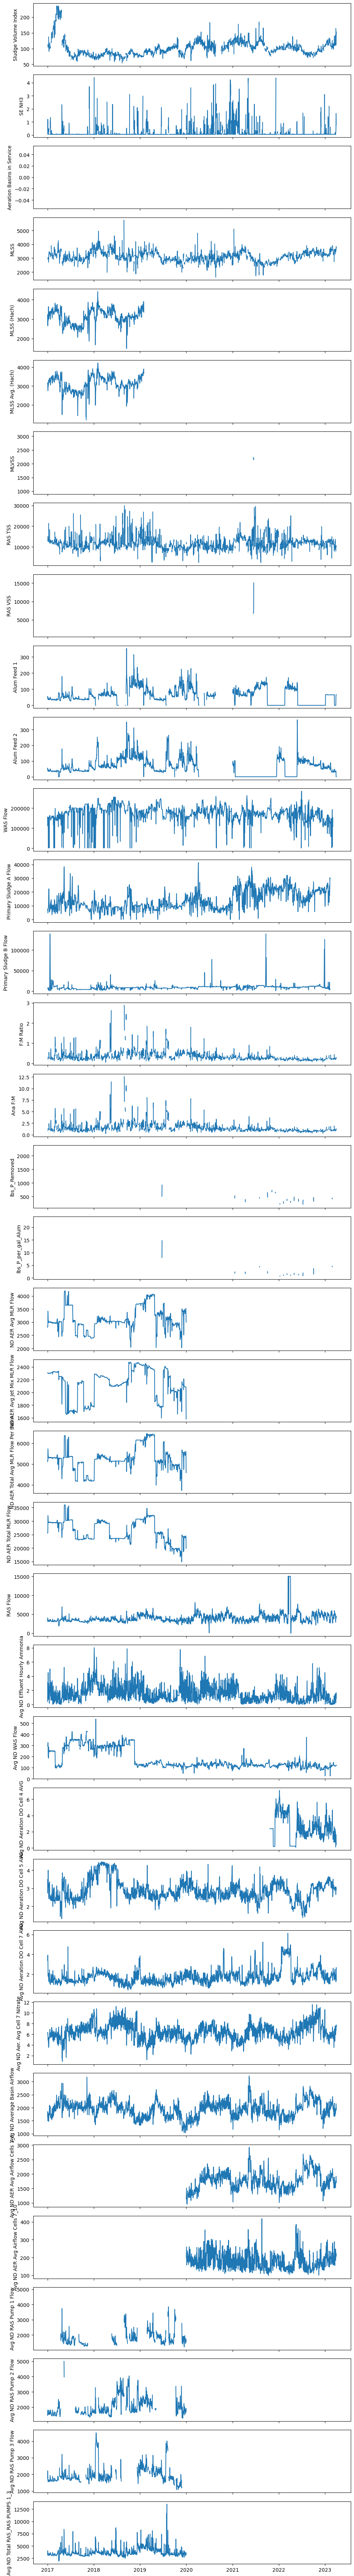

In [11]:
# Plotted metrics to see if any should be dropped.

fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 2 * len(df.columns)), sharex=True)
for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column])
    axes[i].set_ylabel(column)
plt.tight_layout()
plt.show()

The plotted monthly metric medians were also used to identify potential outliers. Very high values for ‘Primary Sludge B Flow’ and ‘Ras Flow’ were identified. I will investigate further in later steps.

In [13]:
# Investigated percentage of NaNs for each metric.

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Date,,
RAS Flow,0,0.000000
Avg ND Aeration DO Cell 5 AVG,0,0.000000
Avg ND Average Basin Airflow,0,0.000000
Avg ND Aer. Avg Cell 7 Nitrate,0,0.000000
Avg ND Aeration DO Cell 7 AVG,0,0.000000
Avg ND Effluent Hourly Ammonia,16,0.701447
Avg ND WAS Flow,46,2.016659
Primary Sludge A Flow,49,2.148181
Primary Sludge B Flow,67,2.937308


In [14]:
# Dropped metrics with too many NaNs and/or very large gaps in data.

columns_to_drop = [
    'Aeration Basins in Service', #100% NaNs. Too many to impute.
    'MLSS (Hach)', #67% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
    'MLSS Avg. (Hach)',  #67% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
    'MLVSS', #87% NaNs. Too many to impute.
    'RAS VSS', #87% NaNs. Too many to impute.
    'lbs_P_Removed', #87% NaNs. Too many to impute.
    'lbs_P_per_gal_Alum', #89% NaNs. Too many to impute.
    'ND AER Avg MLR Flow', #52% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
    'ND AER Avg Jet Mix MLR Flow', #52% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
    'ND AER Total Avg MLR Flow Per Basin', #52% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
    'ND AER Total MLR Flow', #52% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
    'Avg ND Aeration DO Cell 4 AVG', #77% NaNs. Data collection only recently started.
    'Avg ND AER Avg Airflow Cells 1_6', #48% NaNs. Data collection started half way through the data period.
    'Avg ND AER Avg Airflow Cells 7_10', #48% NaNs. Data collection started half way through the data period.
    'Avg ND RAS Pump 1 Flow', #76% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
    'Avg ND RAS Pump 2 Flow', #67% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
    'Avg ND RAS Pump 3 Flow', #66% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
    'Avg ND Total RAS_RAS PUMPS 1_3', #52% NaNs. Data collection stopped half way through the data period. Likely no longer controllable by operator.
]
df = df.drop(columns=columns_to_drop)

### Duplicate rows

In [15]:
# Checked for duplicate rows.

duplicate_rows = df.duplicated()
df[duplicate_rows]

Date,Sludge Volume Index,SE NH3,MLSS,RAS TSS,Alum Feed 1,Alum Feed 2,WAS Flow,Primary Sludge A Flow,Primary Sludge B Flow,F:M Ratio,Ana F:M,RAS Flow,Avg ND Effluent Hourly Ammonia,Avg ND WAS Flow,Avg ND Aeration DO Cell 5 AVG,Avg ND Aeration DO Cell 7 AVG,Avg ND Aer. Avg Cell 7 Nitrate,Avg ND Average Basin Airflow


### NaNs

#### Patterns

In [16]:
# Looked for patterns in day of week that results were recorded.

df['day'] = df.index.dayofweek
day = df.groupby('day').count()
day

Date,Sludge Volume Index,SE NH3,MLSS,RAS TSS,Alum Feed 1,Alum Feed 2,WAS Flow,Primary Sludge A Flow,Primary Sludge B Flow,F:M Ratio,Ana F:M,RAS Flow,Avg ND Effluent Hourly Ammonia,Avg ND WAS Flow,Avg ND Aeration DO Cell 5 AVG,Avg ND Aeration DO Cell 7 AVG,Avg ND Aer. Avg Cell 7 Nitrate,Avg ND Average Basin Airflow
day,,,,,,,,,,,,,,,,,,
0,297,320,291,287,282,287,316,319,316,189,189,326,325,319,326,326,326,326
1,314,319,317,318,282,289,318,319,317,216,216,326,325,323,326,326,326,326
2,314,316,320,319,282,287,314,319,315,305,305,326,325,325,326,326,326,326
3,310,304,311,315,283,286,318,319,316,302,302,326,325,326,326,326,326,326
4,299,1,301,303,285,287,317,319,317,102,102,326,323,324,326,326,326,326
5,100,0,4,3,283,286,310,318,317,92,92,325,321,316,325,325,325,325
6,101,290,6,6,283,287,310,319,316,3,3,326,321,302,326,326,326,326


I noted that ‘SVI’, ‘MLSS’, and ‘RAS TSS’ were collected on weekends less frequently than weekdays. In addition, ‘SE NH3’ was collected on only Sun-Thur. For future versions of the model, I would investigate if this data had been shifted up one row in the database at some point and should be corrected.

In [17]:
# Looked for pattern in month that results were recorded.

df['month'] = df.index.to_period('M').month
month = df.groupby('month').count()
month

Date,Sludge Volume Index,SE NH3,MLSS,RAS TSS,Alum Feed 1,Alum Feed 2,WAS Flow,Primary Sludge A Flow,Primary Sludge B Flow,F:M Ratio,Ana F:M,RAS Flow,Avg ND Effluent Hourly Ammonia,Avg ND WAS Flow,Avg ND Aeration DO Cell 5 AVG,Avg ND Aeration DO Cell 7 AVG,Avg ND Aer. Avg Cell 7 Nitrate,Avg ND Average Basin Airflow,day
month,,,,,,,,,,,,,,,,,,,
1,159,143,134,137,202,217,213,217,217,102,102,217,217,211,217,217,217,217,217
2,161,141,143,143,191,197,196,179,179,106,106,197,188,193,197,197,197,197,197
3,169,154,155,155,217,217,186,186,186,123,123,217,215,214,217,217,217,217,217
4,137,123,121,124,160,160,177,180,173,98,98,180,176,178,180,180,180,180,180
5,147,125,127,127,161,155,185,186,186,99,99,186,186,184,186,186,186,186,186
6,144,126,127,125,171,151,176,180,180,104,104,180,180,178,180,180,180,180,180
7,148,126,130,128,161,156,179,186,186,98,98,186,186,184,186,186,186,186,186
8,141,134,134,133,130,155,179,186,181,108,108,186,186,181,186,186,186,186,186
9,110,122,119,122,135,150,167,180,178,95,95,180,180,169,180,180,180,180,180


#### Interpolation

I handled missing values by performing linear interpolation in both directions. This method was more appropriate than others, such as imputing mean or median, as this is time series data and values are related to each other. Experimenting with different strategies for handling NaN values can be performed for future versions of the model.

In [18]:
# Interpolated NaN values in all columns.

df.interpolate(method='linear', limit_direction='both', inplace=True)

# Data save

In [19]:
# Saved to Excel.
df.to_excel('/Users/NJahns/Desktop/Bootcamp/Capstone_Two/Edited_Data/Wrangled_Data.xlsx', index=True)